In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

'''data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Gender': ['Female', 'Male', 'Male', 'Female']
}
df = pd.DataFrame(data)

# Step 3: Convert 'Gender' column to 0/1
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})'''

"data = {\n    'Name': ['Alice', 'Bob', 'Charlie', 'David'],\n    'Gender': ['Female', 'Male', 'Male', 'Female']\n}\ndf = pd.DataFrame(data)\n\n# Step 3: Convert 'Gender' column to 0/1\ndf['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})"

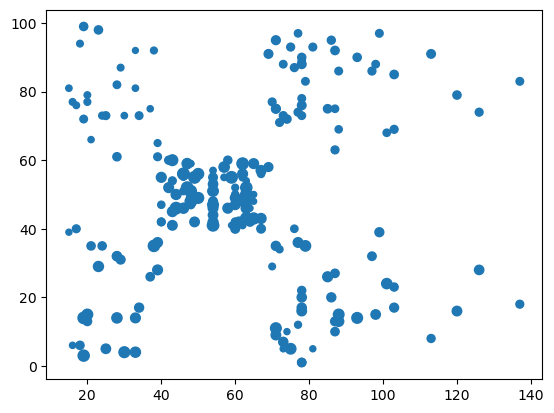

In [3]:
plt.scatter(df['Annual Income (k$)'] ,df['Spending Score (1-100)'],df['Age'])

In [4]:
km =KMeans(n_clusters=5 ,init = "k-means++" ,random_state = 0)
km

KMeans(n_clusters=5, random_state=0)

In [5]:
y_predicted = km.fit_predict(df[[ 'Age' ,'Annual Income (k$)','Spending Score (1-100)' ]])
y_predicted

C:\Users\sucha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sucha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 1, 2, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [6]:
df['cluster'] = y_predicted
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


In [7]:
km.cluster_centers_

array([[45.2173913 , 26.30434783, 20.91304348],
       [32.69230769, 86.53846154, 82.12820513],
       [43.08860759, 55.29113924, 49.56962025],
       [25.52173913, 26.30434783, 78.56521739],
       [40.66666667, 87.75      , 17.58333333]])

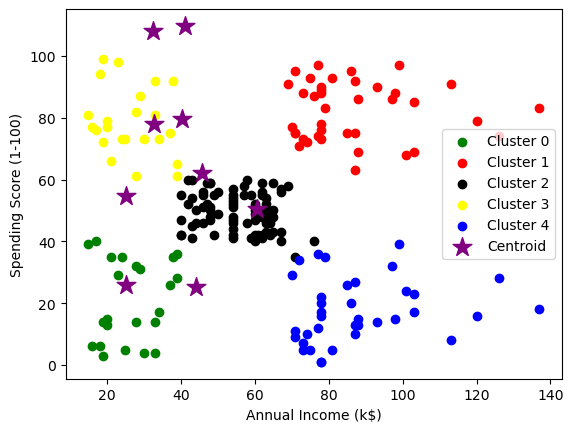

In [11]:
import matplotlib.pyplot as plt

# Assuming df and km are already defined
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]
df5 = df[df.cluster == 4]

plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='green', label='Cluster 0')
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='red', label='Cluster 1')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='black', label='Cluster 2')
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color='yellow', label='Cluster 3')
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], color='blue', label='Cluster 4')

# Plotting the centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', s=200, label='Centroid')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()



In [9]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age' ,'Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)
sse   

C:\Users\sucha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sucha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sucha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sucha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[308812.78,
 212840.1698209719,
 143342.751571706,
 104366.15145556198,
 75363.74835182933,
 58300.44332159069,
 51084.505954934364,
 44346.912788790156,
 40891.3936472568]

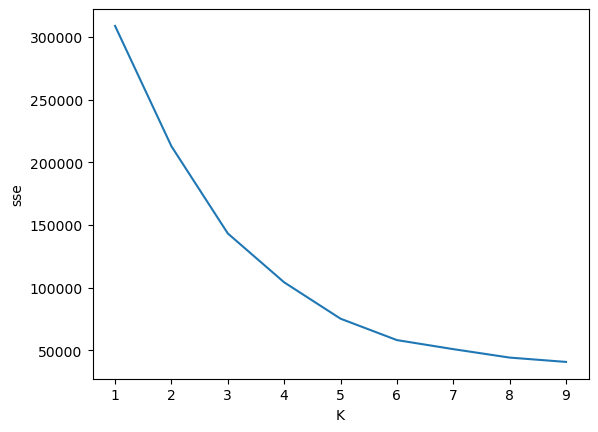

In [10]:
plt.xlabel('K')
plt.ylabel('sse')
plt.plot(k_rng,sse)
